In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from ControlRF.train import *
from ControlRF.viz.episodic_plot import *
from ControlRF.viz.animate import *
from ControlRF.viz.plot import *
from ControlRF.util import *
from ControlRF.eval import eval_c
from core.systems import DoubleInvertedPendulum
import sys
import mosek
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
# import importlib
# importlib.reload(sys.modules[animate.__module__])

In [2]:
system = DoubleInvertedPendulum(.6, .6, .6, .6)
system_est = DoubleInvertedPendulum(1, 1, 1, 1)
system.l_1=1
system.l_2=1

In [3]:
Q, R = 10 * np.identity(4), np.identity(2)
system_est.lyap = AffineQuadCLF.build_care(system_est, Q, R)
system_est.alpha = min(la.eigvalsh(Q)) / max(la.eigvalsh(system_est.lyap.P))

model_lqr = LQRController.build(system_est, Q, R)
system_est.fb_lin = FBLinController(system_est, model_lqr)

system.qp_controller = QPController.build_care(system_est, Q, R)
system.qp_controller.add_regularizer(system_est.fb_lin, 16)
system.qp_controller.add_static_cost(np.identity(2))
system.qp_controller.add_stability_constraint(
    system_est.lyap, comp=lambda r: system_est.alpha * r, slacked=True, coeff=1e6
)

system.lyap = AffineQuadCLF.build_care(system, Q, R)
system.alpha = min(la.eigvalsh(Q)) / max(la.eigvalsh(system.lyap.P))
lqr = LQRController.build(system, Q, R)
system.fb_lin = FBLinController(system, lqr)
system.oracle_controller = QPController.build_care(system, Q, R)
system.oracle_controller.add_regularizer(system.fb_lin, 16)
# system.oracle_controller.add_static_cost(100* np.identity(2))
system.oracle_controller.add_stability_constraint(
    system.lyap, comp=lambda r: system.alpha * r, slacked=True, coeff=1e5
)

In [4]:
def plot_qp(func):
    ts = np.linspace(0, T, num_steps)
    qp_zs = func(system, system.qp_controller, x_0, T, num_steps)
    model_zs = func(system, system.oracle_controller, x_0, T, num_steps)
    fig, ax = plt.subplots()
    time = 0
    ax.plot(ts[time:], qp_zs[time:], "-", label="qp_controller")
    ax.plot(ts[time:], model_zs[time:], "k-.", label="oracle_controller")

    plt.show()
    plt.close()

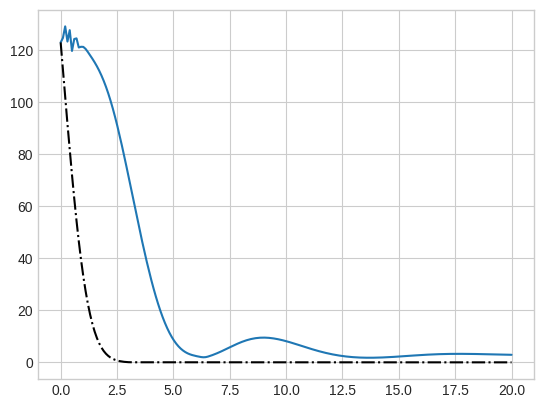

In [5]:
x_0 = np.array([3.1, 0, 0, 0])
T = 20
num_steps = 200
epochs = 10

plot_qp(eval_c)

In [6]:
gps_names = ['ad_kernel', 'adp_kernel', 'ad_rf', 'adp_rf']
controllers, gps = train_episodic(system, system_est, x_0, epochs, T, num_steps, gps_names, info=True, func=eval_c, sgm=5, slack='linear')

ad_kernel
training time for ad_kernel_gp is: 0.6867855440359563
adp_kernel
training time for adp_kernel_gp is: 0.6787310519721359
ad_rf
training time for ad_rf_gp is: 0.009065404068678617
adp_rf
training time for adp_rf_gp is: 0.015209418023005128


  0%|          | 0/10 [00:00<?, ?it/s]

ad_kernel
training time for ad_kernel_gp is: 1.2289524408988655
adp_kernel
training time for adp_kernel_gp is: 0.6957732599694282
ad_rf
training time for ad_rf_gp is: 0.31265496206469834
adp_rf
training time for adp_rf_gp is: 0.44030026299878955
iteration0:data size:398


 10%|█         | 1/10 [04:47<43:07, 287.47s/it]

ad_kernel
training time for ad_kernel_gp is: 1.6840905770659447
adp_kernel
training time for adp_kernel_gp is: 1.06816910719499
ad_rf
training time for ad_rf_gp is: 0.09662449709139764
adp_rf
training time for adp_rf_gp is: 0.005567902000620961
iteration1:data size:597


 20%|██        | 2/10 [08:12<31:50, 238.82s/it]

ad_kernel
training time for ad_kernel_gp is: 0.3627107539214194
adp_kernel
training time for adp_kernel_gp is: 0.5165512489620596
ad_rf
training time for ad_rf_gp is: 0.014637843007221818
adp_rf
training time for adp_rf_gp is: 0.008104471955448389
iteration2:data size:796


 30%|███       | 3/10 [11:48<26:38, 228.36s/it]

ad_kernel
training time for ad_kernel_gp is: 2.590305842924863
adp_kernel
training time for adp_kernel_gp is: 1.951903039123863
ad_rf
training time for ad_rf_gp is: 0.4743231169413775
adp_rf
training time for adp_rf_gp is: 1.1350300970952958
iteration3:data size:995


 40%|████      | 4/10 [16:39<25:20, 253.35s/it]

ad_kernel
training time for ad_kernel_gp is: 1.23421625001356
adp_kernel
training time for adp_kernel_gp is: 0.7631480710115284
ad_rf
training time for ad_rf_gp is: 0.09676888096146286
adp_rf
training time for adp_rf_gp is: 0.02101415814831853
iteration4:data size:1194


 50%|█████     | 5/10 [20:58<21:15, 255.18s/it]

ad_kernel
training time for ad_kernel_gp is: 3.9473886869382113
adp_kernel
training time for adp_kernel_gp is: 3.297238138038665
ad_rf
training time for ad_rf_gp is: 0.726708569098264
adp_rf
training time for adp_rf_gp is: 0.4727098948787898
iteration5:data size:1393


 60%|██████    | 6/10 [26:41<19:00, 285.21s/it]

ad_kernel
training time for ad_kernel_gp is: 3.9538057011086494
adp_kernel
training time for adp_kernel_gp is: 3.103813554858789
ad_rf
training time for ad_rf_gp is: 1.380180629901588
adp_rf
training time for adp_rf_gp is: 0.5300385758746415
iteration6:data size:1592


 70%|███████   | 7/10 [32:36<15:23, 307.97s/it]

ad_kernel
training time for ad_kernel_gp is: 4.431875873124227
adp_kernel
training time for adp_kernel_gp is: 4.127332506934181
ad_rf
training time for ad_rf_gp is: 0.39790616487152874
adp_rf
training time for adp_rf_gp is: 1.7918117840308696
iteration7:data size:1791


 80%|████████  | 8/10 [38:51<10:58, 329.43s/it]

ad_kernel
training time for ad_kernel_gp is: 1.7344830681104213
adp_kernel
training time for adp_kernel_gp is: 1.451927490066737
ad_rf
training time for ad_rf_gp is: 0.1609837741125375
adp_rf
training time for adp_rf_gp is: 0.20342358713969588
iteration8:data size:1990


 90%|█████████ | 9/10 [43:28<05:12, 312.82s/it]

ad_kernel
training time for ad_kernel_gp is: 3.585670134983957
adp_kernel
training time for adp_kernel_gp is: 2.489145569037646
ad_rf
training time for ad_rf_gp is: 1.2679429340641946
adp_rf
training time for adp_rf_gp is: 0.26530869700945914
iteration9:data size:2189


100%|██████████| 10/10 [48:15<00:00, 289.55s/it]


In [7]:
data = np.load('data/diff_from_oracle.npz')
print(data["gp_zs"].T)

[[ 251.79160795  267.64849721  246.12814335  431.20476666]
 [ 139.94868486  143.93383221  186.51735371  329.25418323]
 [ 120.62374891  124.81055875  296.80610332  430.64630117]
 [5272.43467903  113.23803605  264.29004687  433.71263968]
 [ 101.55733752  107.81836067  166.81019088  224.27596325]
 [  93.47052775  103.28454025  131.83489214  431.64061245]
 [  90.16942784   99.71636004  203.30336376  427.94202001]
 [  83.85750319   95.78466436  101.18178388  425.22120422]
 [  82.20607245   92.17513557  102.27136849  227.14134016]
 [  85.74367783   89.85643173  150.75493685  432.79617499]]


In [8]:
# slacks = ['linear', 'quadratic']
# sgms = [5,10,15,20,25,30]
# for sgm in sgms:
#     for slack in slacks:
#         controllers, gps = train_episodic(system, system_est, x_0, epochs, T, num_steps, info=True, func=eval_c, sgm=sgm, slack=slack)
#         data = np.load('data/_diff from oracle.npz')
#         print(f'sgm={sgm}, slack={slack},diff={data["gp_zs"].T[-1]}')

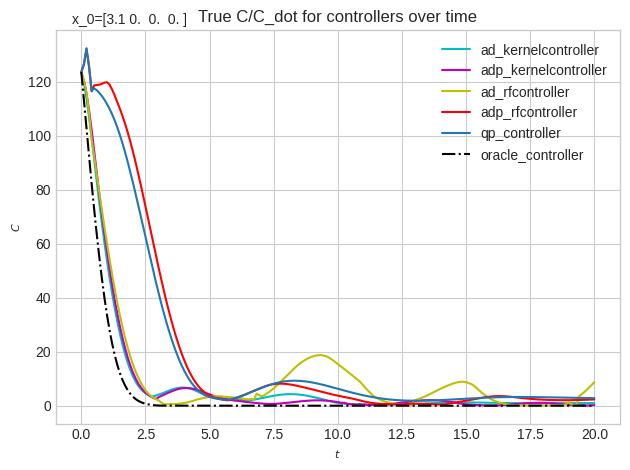

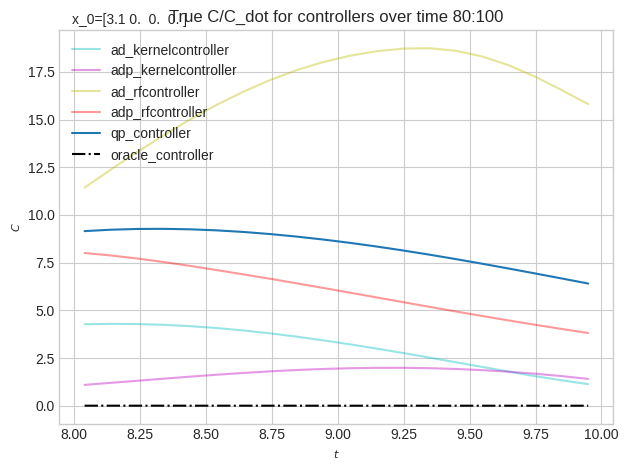

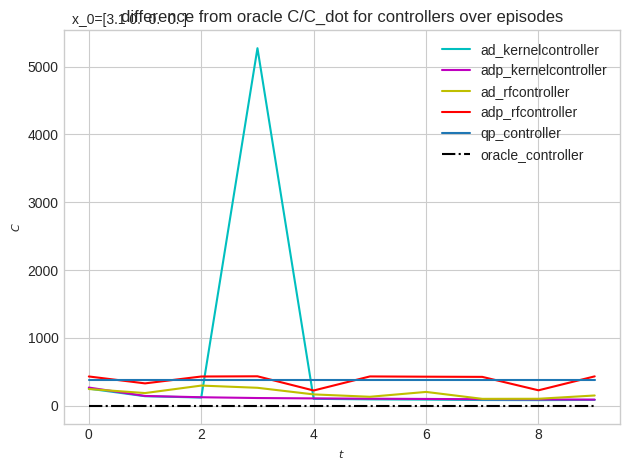

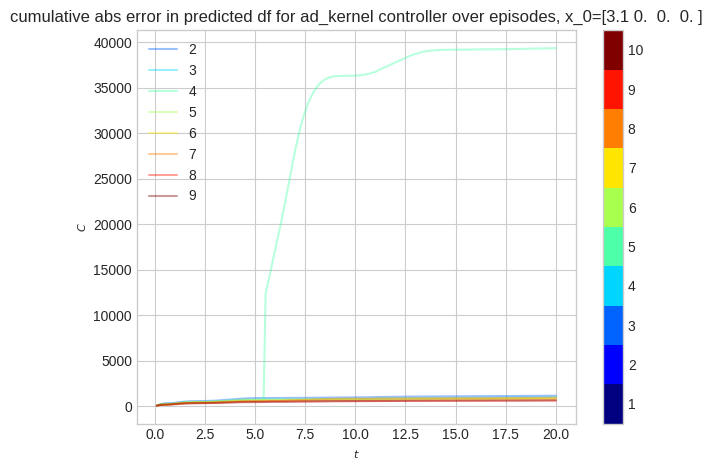

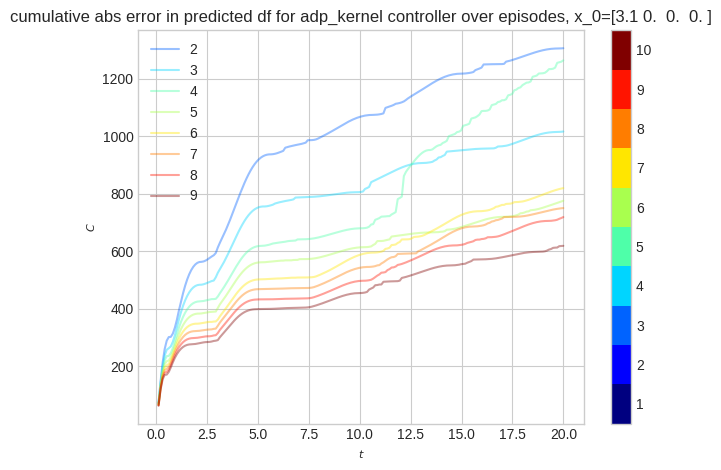

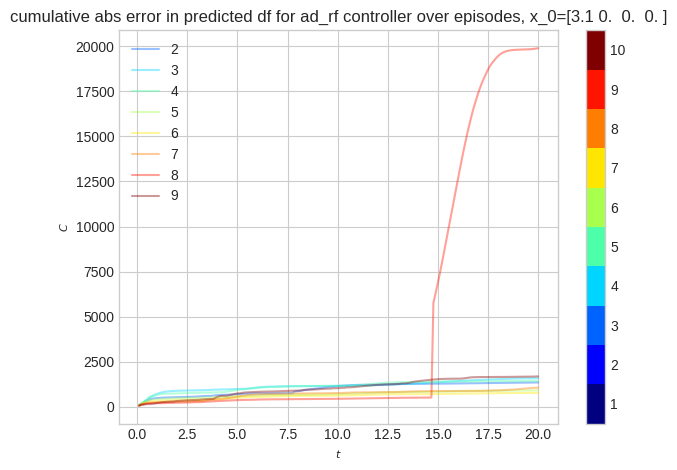

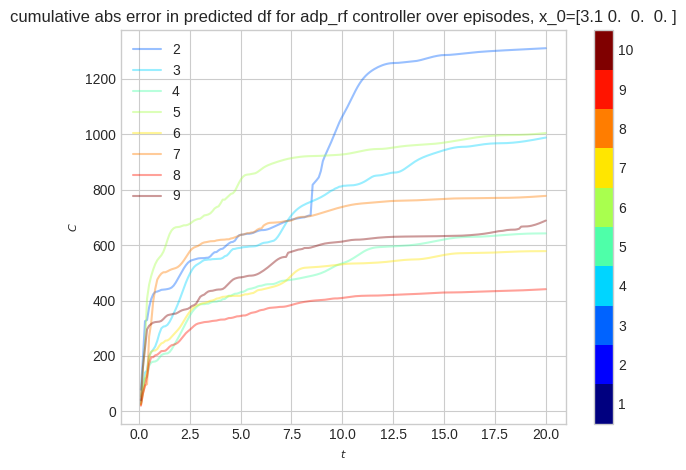

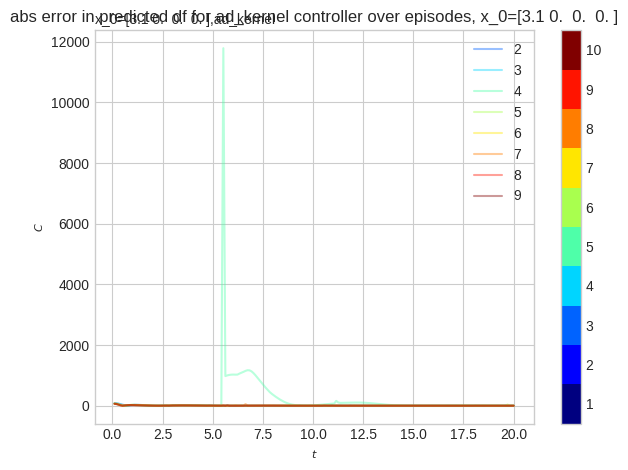

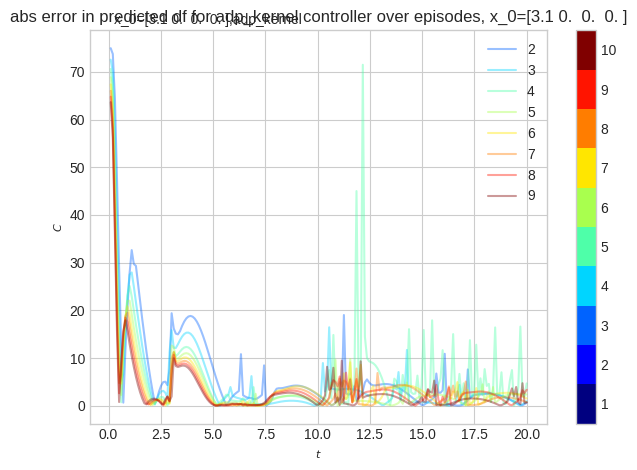

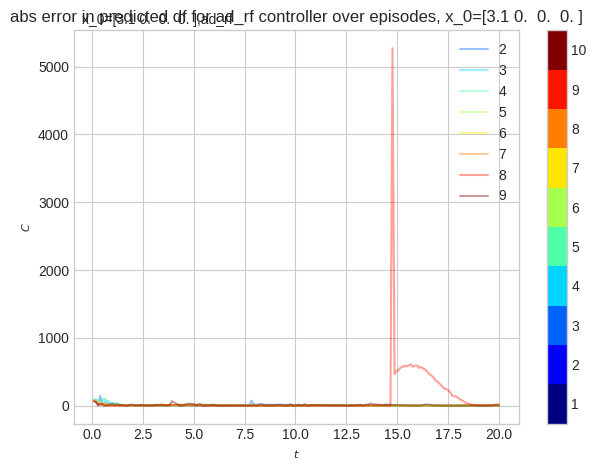

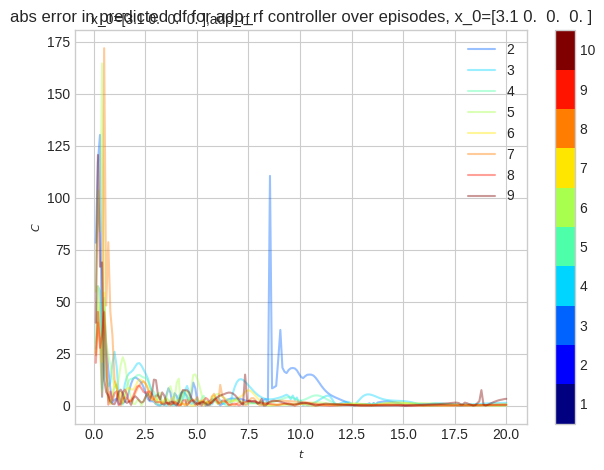

In [9]:
path = 'data/eval_c.npz'
plot_info(x_0, controllers, path)
plot_info(x_0, controllers, 'data/diff_from_oracle.npz', diff=True)
# plot_predicted_vs_true_func(x_0, epochs, T)
episodic_plot_cum_predicted_vs_true_func(x_0, epochs, T, num_steps)
episodic_plot_predicted_vs_true_func(x_0, epochs, T, num_steps)

In [10]:
# create_grid_data(system, qp_controller, lyap, lyap_est, T, num_steps)
# episodic_plot_func_for_controller(x_0, 10, path, gp_names)

In [15]:
create_animation(system, controllers, gps, x_0)

4it [08:16, 124.16s/it]


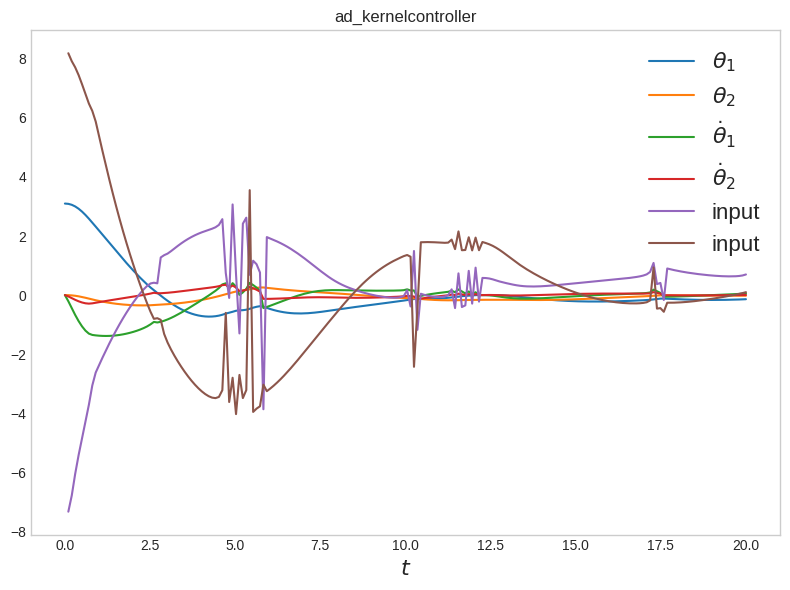

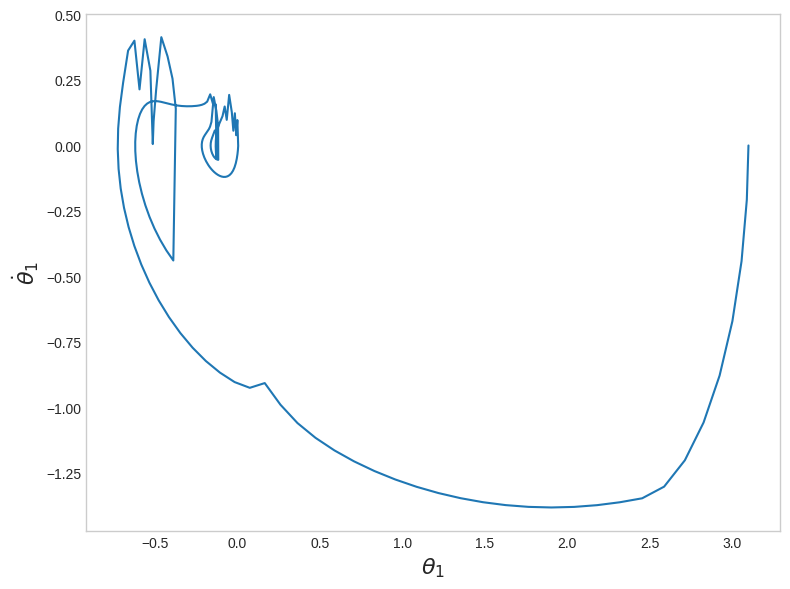

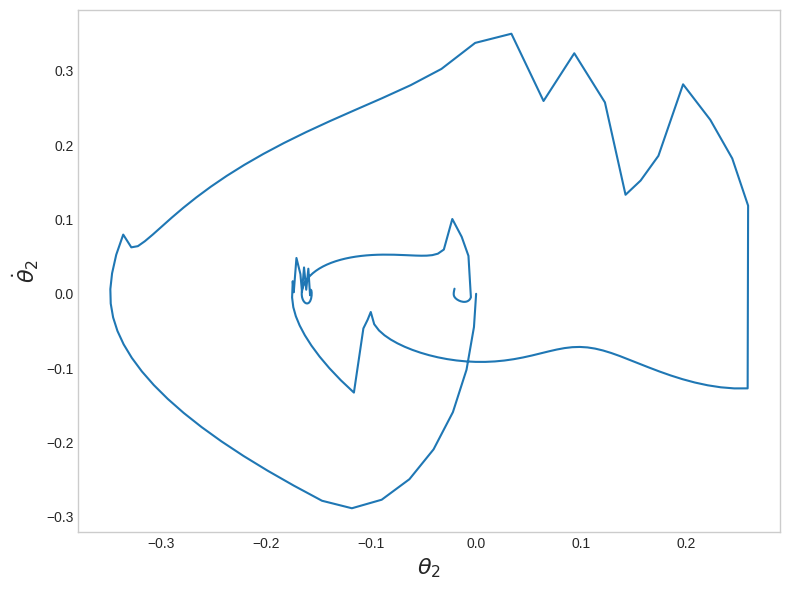

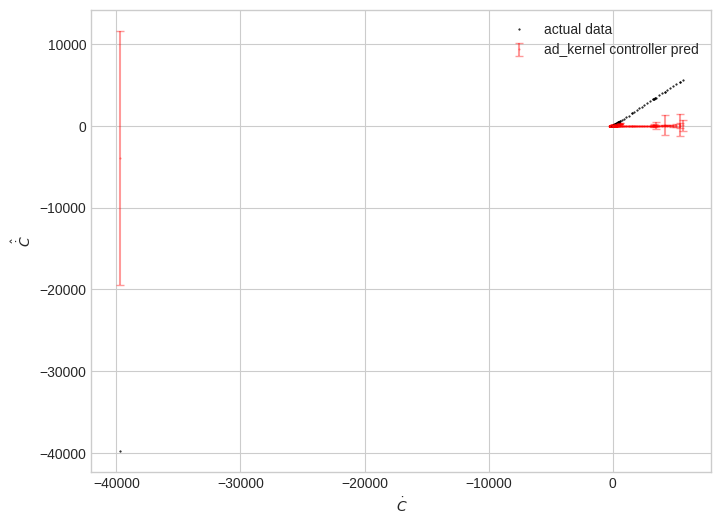

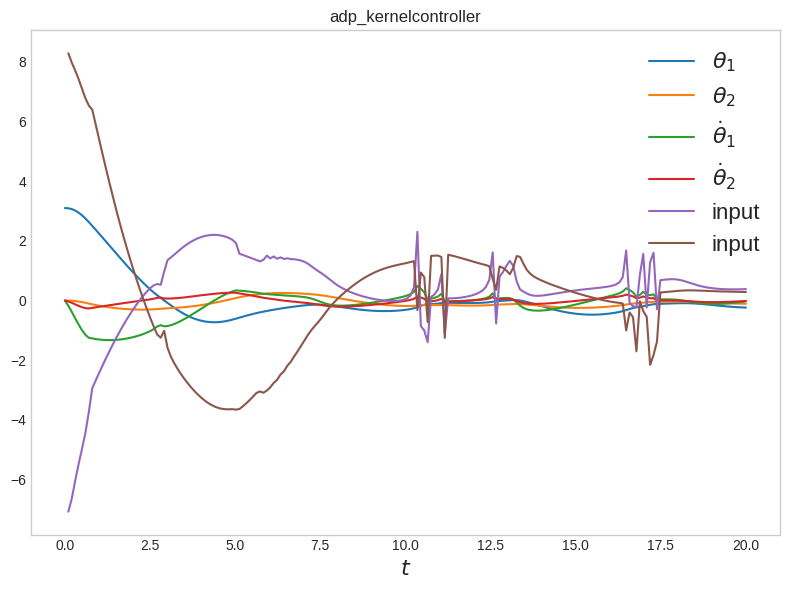

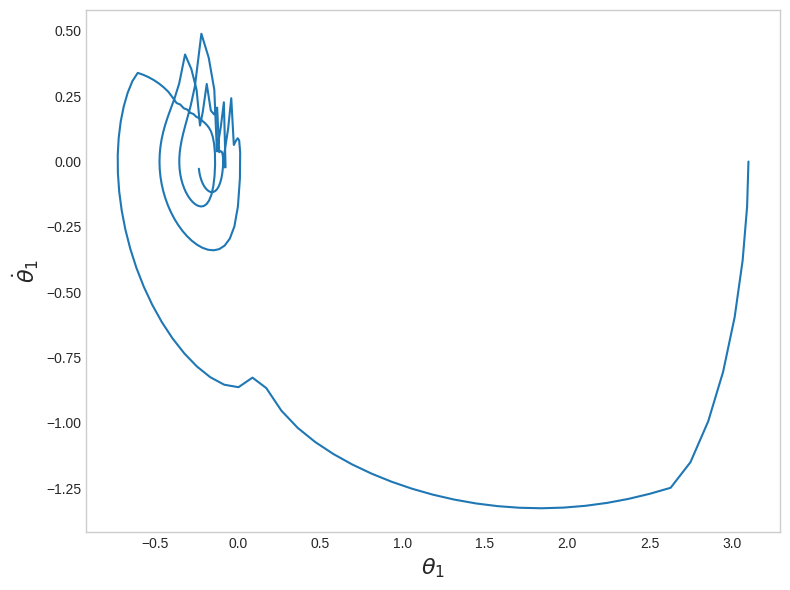

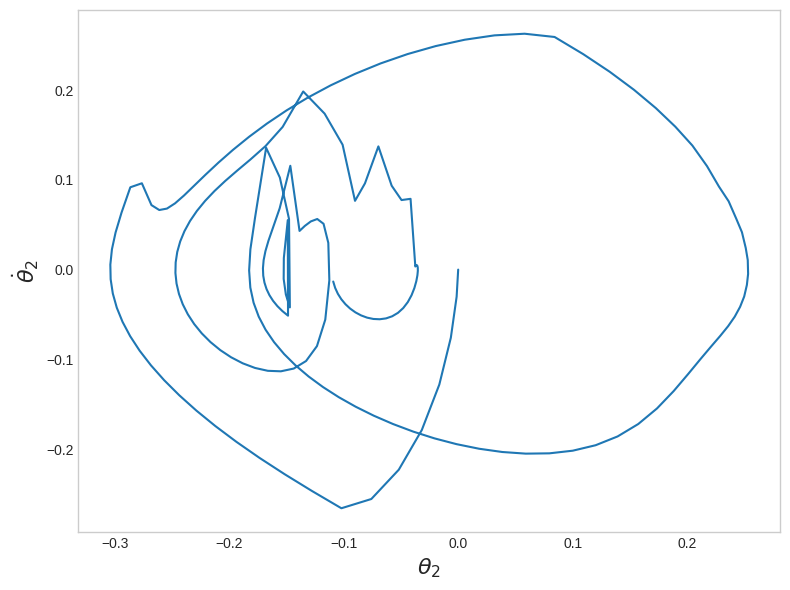

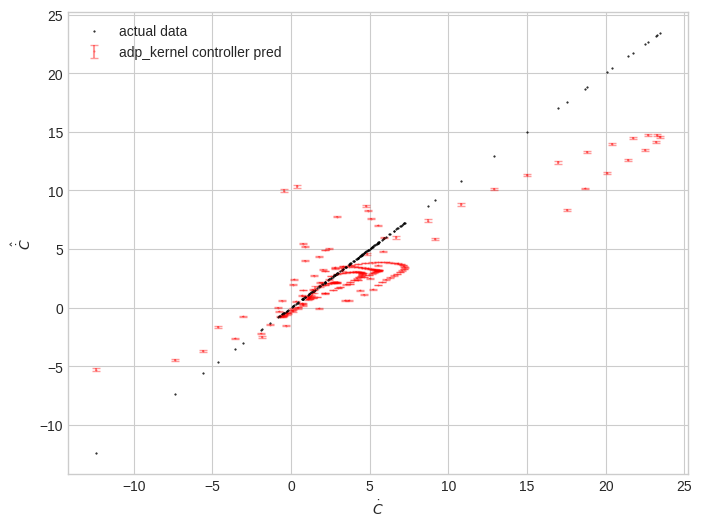

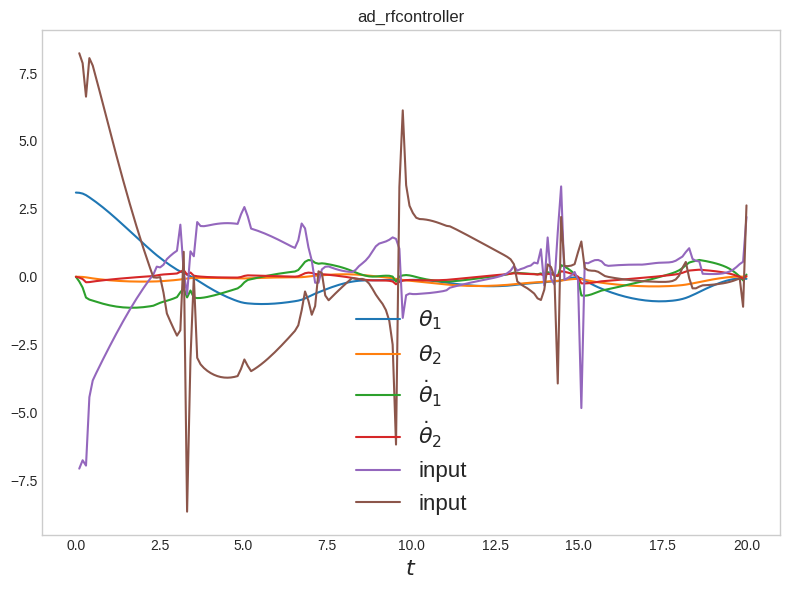

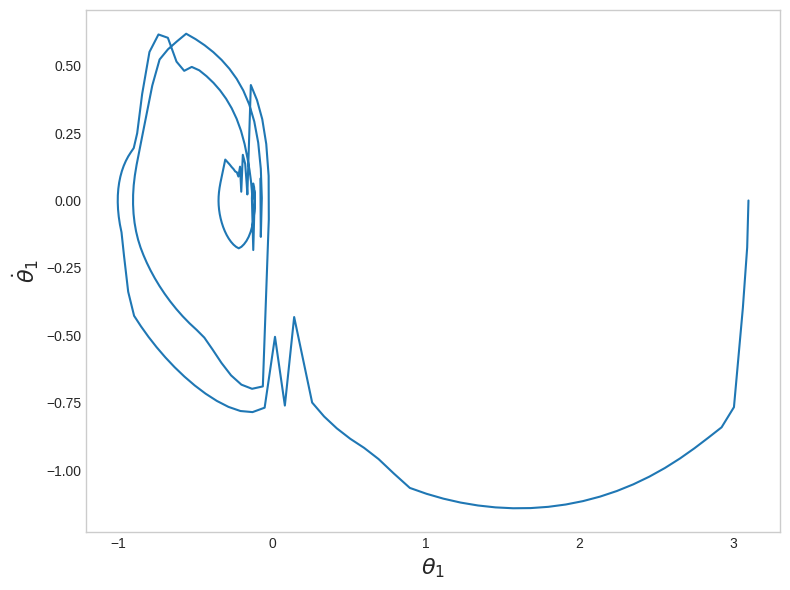

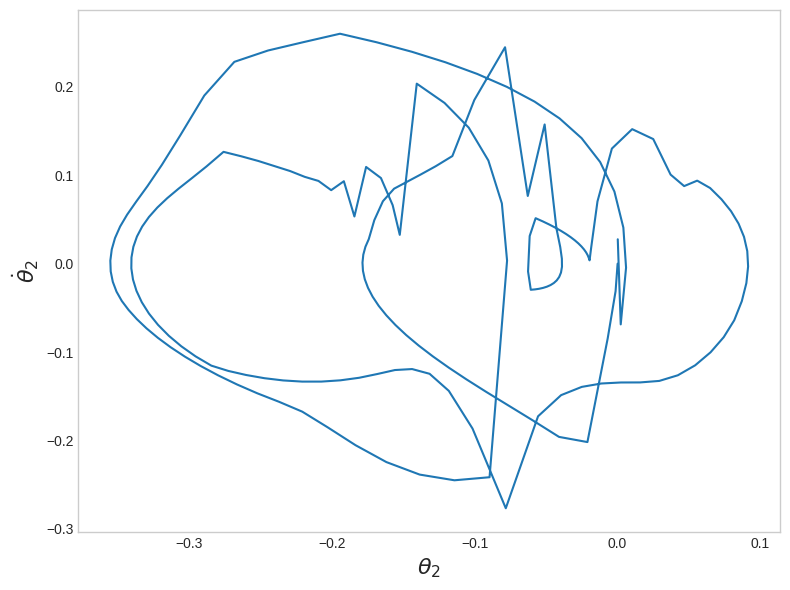

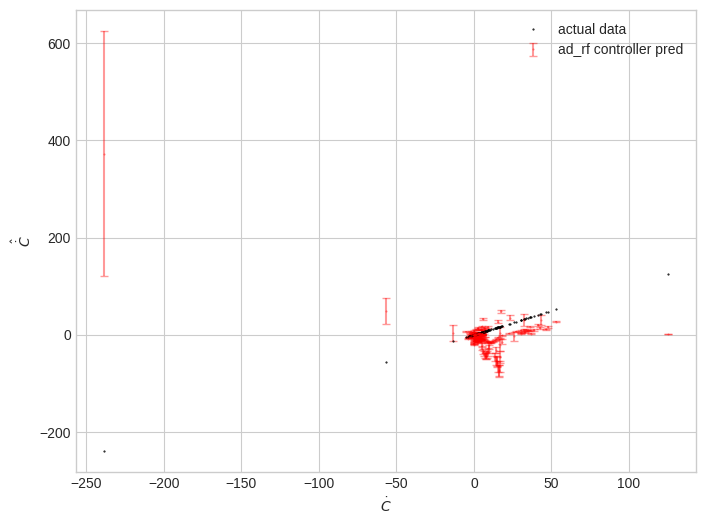

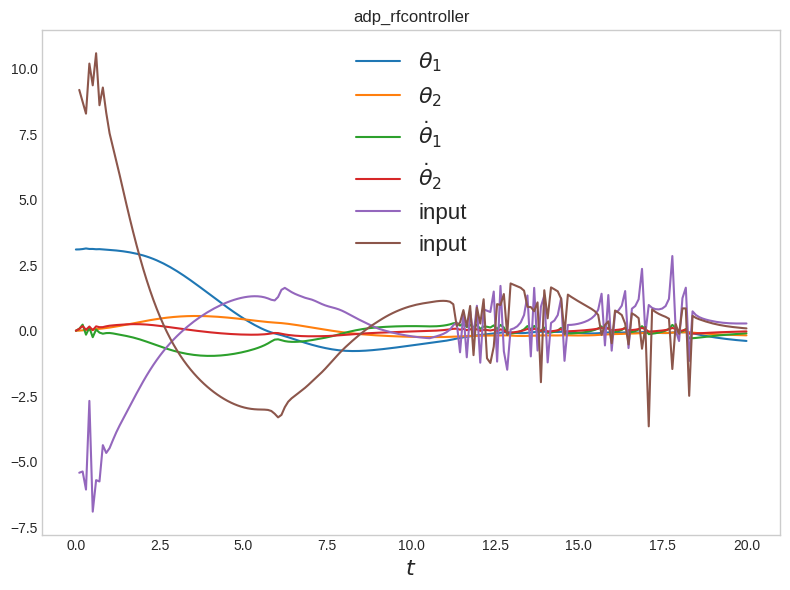

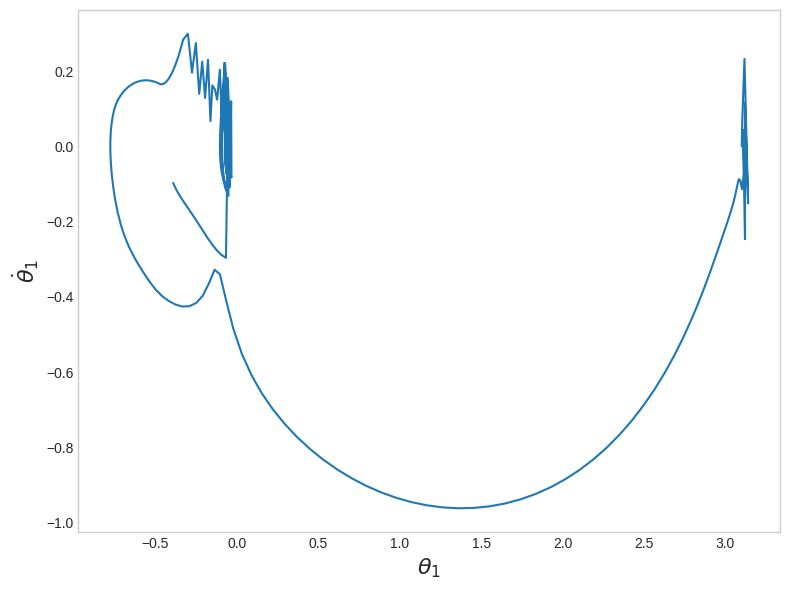

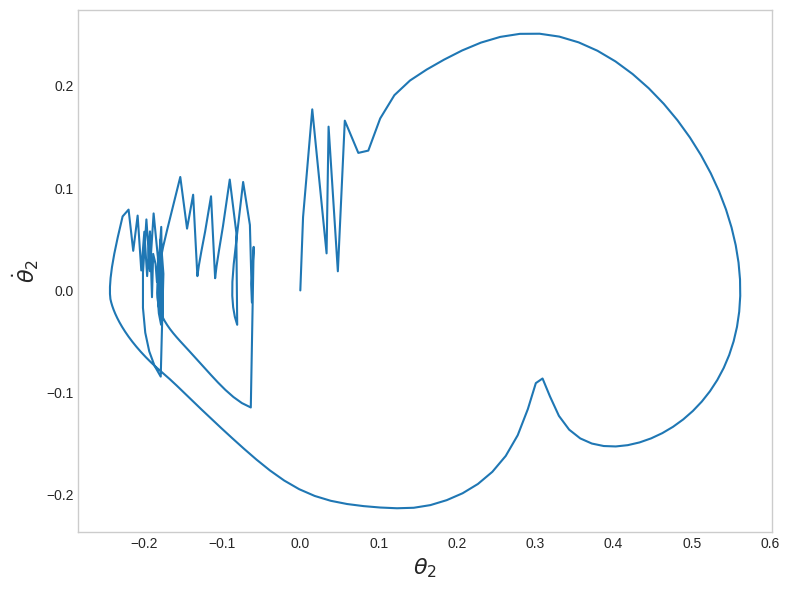

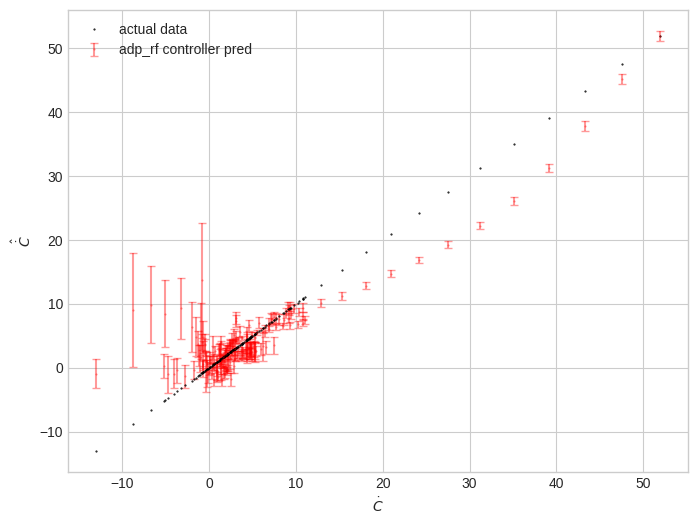

In [19]:
for gp,controller in zip(gps, controllers):
    plot_simulation_dip(system, controller, x_0, T, num_steps)
    plot_closed_loop_errorbar(
    system, system_est, controller, gp, x_0, T, num_steps, cut_off=20)

